<a href="https://colab.research.google.com/github/kariukimary/fruit_veg-_image_recognition/blob/main/Fruit_veg_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries


In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


#training image preprocessing

In [62]:
training_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_dataset/train',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False


)

Found 3115 files belonging to 36 classes.


#validation image processing

In [63]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_dataset/validation',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.



#building the model


In [5]:
#define the model
cnn=tf.keras.models.Sequential()

#Building a convolutional layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
#the dropout is used to avoid overfitting
cnn.add(tf.keras.layers.Dropout(0.5))

In [9]:
#flattening the matrix
cnn.add(tf.keras.layers.Flatten())

In [10]:
#units means 128 neurons
cnn.add(tf.keras.layers.Dense(units=128,activation='relu',))

In [11]:
#input layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#compling and training phase

In [12]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
traning_histrory=cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 [==============================] - 856s 8s/step - loss: 9.7948 - accuracy: 0.0449 - val_loss: 3.5475 - val_accuracy: 0.0798
Epoch 2/30
98/98 [==============================] - 127s 1s/step - loss: 3.9091 - accuracy: 0.0620 - val_loss: 3.0608 - val_accuracy: 0.1652
Epoch 3/30
98/98 [==============================] - 168s 2s/step - loss: 4.0792 - accuracy: 0.1152 - val_loss: 2.6934 - val_accuracy: 0.3789
Epoch 4/30
98/98 [==============================] - 147s 1s/step - loss: 3.9104 - accuracy: 0.1018 - val_loss: 3.5253 - val_accuracy: 0.0427
Epoch 5/30
98/98 [==============================] - 151s 1s/step - loss: 3.7157 - accuracy: 0.0485 - val_loss: 3.4204 - val_accuracy: 0.0655
Epoch 6/30
98/98 [==============================] - 127s 1s/step - loss: 3.7522 - accuracy: 0.0449 - val_loss: 3.6370 - val_accuracy: 0.0342
Epoch 7/30
98/98 [==============================] - 133s 1s/step - loss: 3.6890 - accuracy: 0.0372 - val_loss: 3.5446 - val_accuracy: 0.0399
Epoch 8/30
98

#saving the model

In [14]:
cnn.save('trained model.h5')

In [21]:
#recording the history in json format
import json
with open('training_hist.json','w')as file:
  json.dump(traning_histrory.history,file)


In [16]:
#this shows what the training history entails
print(traning_histrory.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [17]:
print('validation_set accuracy:{} %'.format(traning_histrory.history['val_accuracy'][-1]*100))

validation_set accuracy:95.72649598121643 %


#Accuracy visuallization

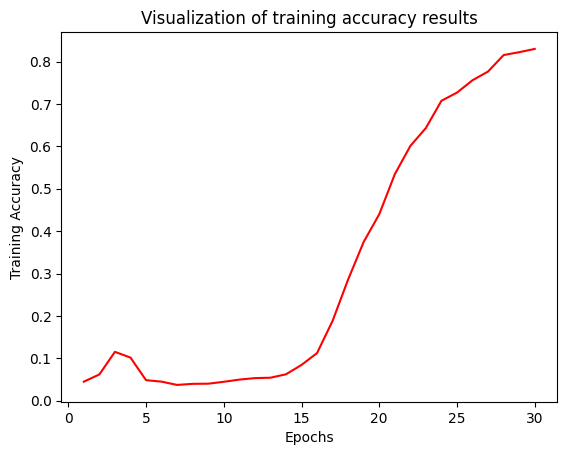

In [29]:
#training visualization
epochs=[i for i in range(1,31)]
plt.plot(epochs,traning_histrory.history['accuracy'],color='red')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of training accuracy results')
plt.show()

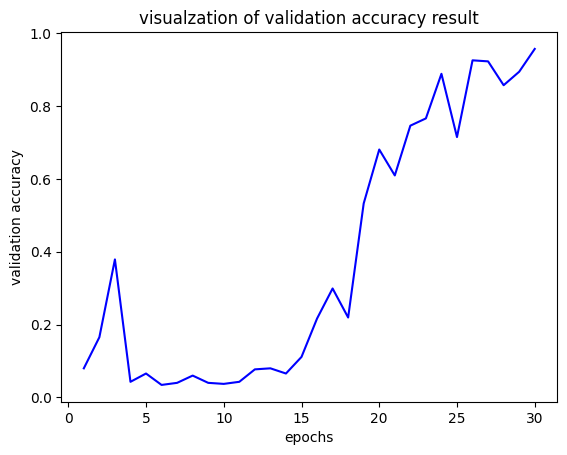

In [34]:
plt.plot(epochs,traning_histrory.history['val_accuracy'],color='blue')
plt.xlabel('epochs')
plt.ylabel('validation accuracy')
plt.title('visualzation of validation accuracy result')
plt.show()

 # visualization and Performing prediction on a single image

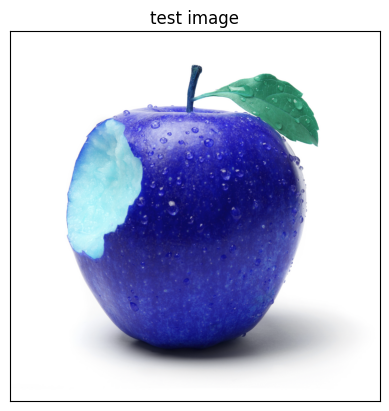

In [48]:
#the x and the yticks are used to remove the scalling on both axes
import cv2
image_path='/content/drive/MyDrive/fruit_dataset/test/apple/Image_1.jpg'
img=cv2.imread(image_path)
plt.imshow(img)
plt.title('test image')
plt.xticks([])
plt.yticks([])
plt.show()


#Testing the model

In [60]:
#loading the image
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
#converting the image in array form
input_arr=tf.keras.preprocessing.image.img_to_array(image)
#converting singe image to batch
input_arr = np.expand_dims(input_arr, axis=0)
prediction=cnn.predict(input_arr)

1/1 [==============================] - 0s 157ms/step


In [61]:
print(prediction)

[[9.9974662e-01 4.0928084e-30 3.4062200e-08 2.0939500e-11 1.2971890e-21
  1.5537962e-05 1.4818832e-13 5.3391759e-20 2.1305091e-08 4.1173935e-23
  7.2412323e-31 1.8306842e-21 1.5432497e-21 1.8351309e-21 7.1632299e-17
  1.4862999e-12 6.7668192e-23 8.8625298e-25 1.3292840e-21 2.4040332e-19
  1.8955433e-08 1.1189935e-21 1.5405648e-04 7.2670418e-11 5.5093571e-26
  3.9993921e-20 1.7167780e-08 3.3893767e-19 7.6065917e-05 5.2165355e-25
  1.6118344e-31 6.5920184e-21 1.1884298e-14 2.3188703e-11 3.6101006e-15
  7.6981896e-06]]


In [65]:
test_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_dataset/test',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False


)

Found 359 files belonging to 36 classes.


In [69]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [67]:
result_index=np.where(prediction[0]==max(prediction[0]))
print(result_index[0])

[0]


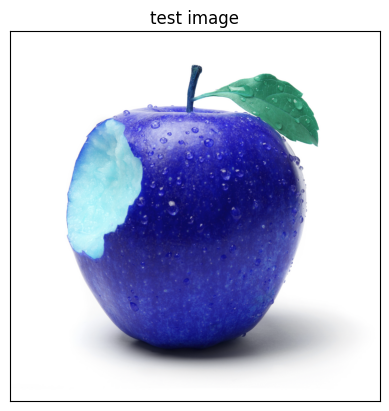

In [68]:
#display the iamge to test the model
plt.imshow(img)
plt.title('test image')
plt.xticks([])
plt.yticks([])
plt.show()

#single prediction

In [70]:
print('it is a {}'.format(test_set.class_names[result_index[0][0]]))

it is a apple
